# Intro to Keras Tutorial
##### https://colab.research.google.com/drive/1aAnUNTCLwKRs6h1SsekMTO0hU_51s1ig?usp=sharing#scrollTo=Ww13vYIIURGV

In [41]:
#Importing Keras and other imports
from tensorflow import keras
import numpy as npa
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

In [43]:
#Loading datasets
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [44]:
#Seeing shapes of data
print("X_train:", X_train_full.shape)
print("y_train:", y_train_full.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [45]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [46]:
y_test[0]

7

In [47]:
X_train_full[0].shape

(28, 28)

In [48]:
#Looking at test data
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The expected value is: 4


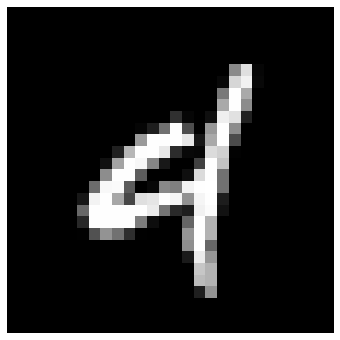

In [49]:
#Rerun to get different numbers
def plotImage(image):
    """A 28x28 array that represents an image."""
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap="gray")
    plt.axis(False)
    plt.show()
sample_image = np.random.randint(0, len(X_train_full))
print("The expected value is:", y_train_full[sample_image])
plotImage(X_train_full[sample_image])

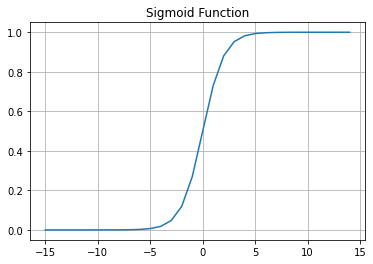

In [50]:
#Example of Sigmoid function
def sigmoid(x):
    return 1/(np.exp(-x) + 1)
plt.plot(np.arange(-15, 15), sigmoid(np.arange(-15, 15)))
plt.title("Sigmoid Function")
plt.grid()
plt.show()

In [51]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255
#No need to do y_test since it's not being fed into the data.
#Also, data is already shuffled, so no need to do so here

In [52]:
#Including random seeds here again in case for reproducibility
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
#If the two lines above give you error, mute them and run the following:
import tensorflow
tensorflow.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

#Another similar way of writing the above code is:
# model = keras.model.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="sigmoid"),
#     keras.layers.Dense(100, activation="sigmoid"),
#     keras.layers.Dense(10, activation="softmax")
# ])
#Your choice in preference.

In [53]:
#Inputting the first hidden layer, should be in the shape of 0-1
weight = model.layers[1].get_weights()
weight[0]

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [54]:
model.compile(loss="sparse_categorical_crossentropy", #Loss function
              optimizer="sgd", #Stochastic Gradient Descent
             metrics=["accuracy"])

In [55]:
y_valid.shape

(5000,)

In [56]:
X_valid.shape

(5000, 28, 28)

In [57]:
X_train.shape

(55000, 28, 28)

In [58]:
y_train.shape

(55000,)

In [59]:
#May take a while
history = model.fit(X_train, y_train, epochs=30, 
                  validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 2.1718 - accuracy: 0.3760 - val_loss: 1.9587 - val_accuracy: 0.5422
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 1.5916 - accuracy: 0.6502 - val_loss: 1.2082 - val_accuracy: 0.7258
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9993 - accuracy: 0.7686 - val_loss: 0.8152 - val_accuracy: 0.8084
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7290 - accuracy: 0.8228 - val_loss: 0.6272 - val_accuracy: 0.8452
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5895 - accuracy: 0.8512 - val_loss: 0.5246 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5084 - accuracy: 0.8688 - val_loss: 0.4614 - val_accuracy: 0.8772
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4572 - accuracy: 0.8785 - val_loss: 0.4177 - val_accuracy:

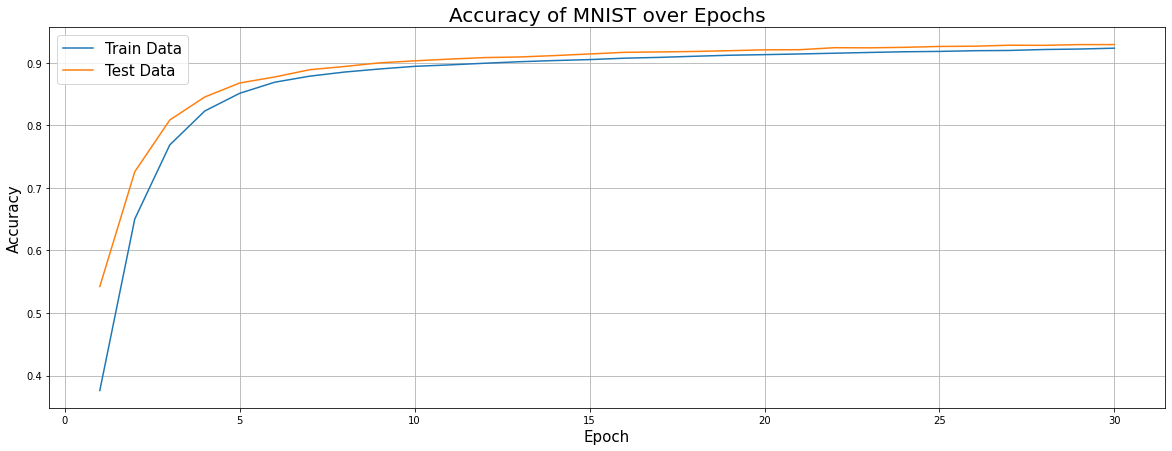

In [60]:
#Plotting Accuracy
plt.figure(figsize = (20, 7))
plt.plot(np.arange(1, 31), history.history["accuracy"], label = "Train Data")
plt.plot(np.arange(1, 31), history.history["val_accuracy"], label = "Test Data")
plt.legend(fontsize = 15)
plt.xlabel("Epoch", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("Accuracy of MNIST over Epochs", size = 20)
plt.grid()
plt.show()

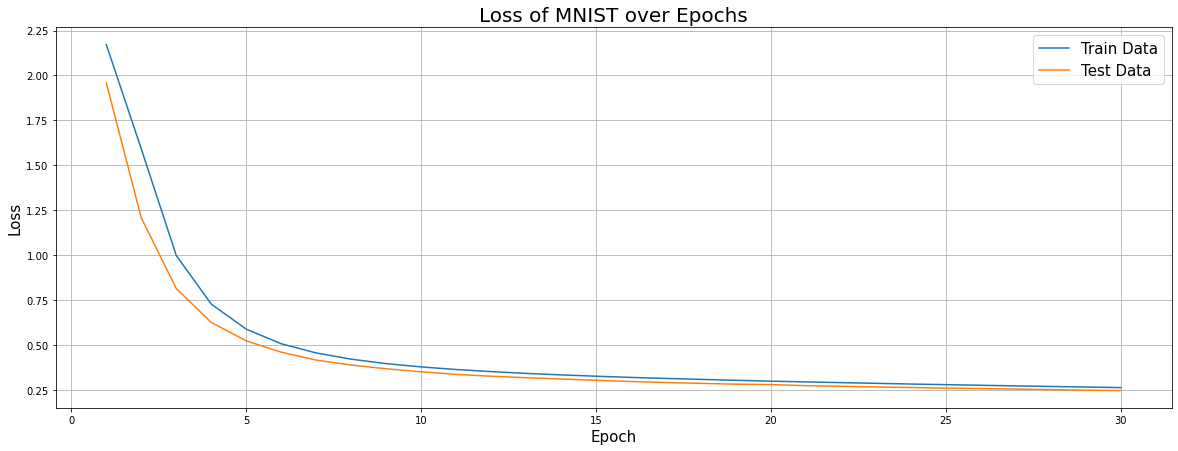

In [22]:
#Plotting Loss
plt.figure(figsize = (20, 7))
plt.plot(np.arange(1, 31), history.history["loss"], label = "Train Data")
plt.plot(np.arange(1, 31), history.history["val_loss"], label = "Test Data")
plt.legend(fontsize = 15)
plt.xlabel("Epoch", size = 15)
plt.ylabel("Loss", size = 15)
plt.title("Loss of MNIST over Epochs", size = 20)
plt.grid()
plt.show()

In [61]:
#Determining error from confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, np.argmax(model.predict(X_test), axis = -1))

array([[ 962,    0,    3,    1,    0,    5,    6,    2,    1,    0],
       [   0, 1109,    2,    2,    0,    2,    4,    2,   14,    0],
       [  13,    6,  932,    8,   12,    3,   14,   12,   28,    4],
       [   2,    1,   22,  918,    0,   30,    1,   16,   16,    4],
       [   1,    2,    6,    0,  922,    0,   12,    2,    6,   31],
       [  10,    2,    4,   41,    6,  780,   12,    7,   22,    8],
       [  14,    3,    6,    1,   10,   16,  904,    2,    2,    0],
       [   4,    9,   22,    6,    6,    0,    0,  962,    1,   18],
       [   7,    7,    8,   24,    9,   33,   11,   12,  859,    4],
       [  13,    8,    1,   10,   33,    6,    0,   24,    6,  908]])

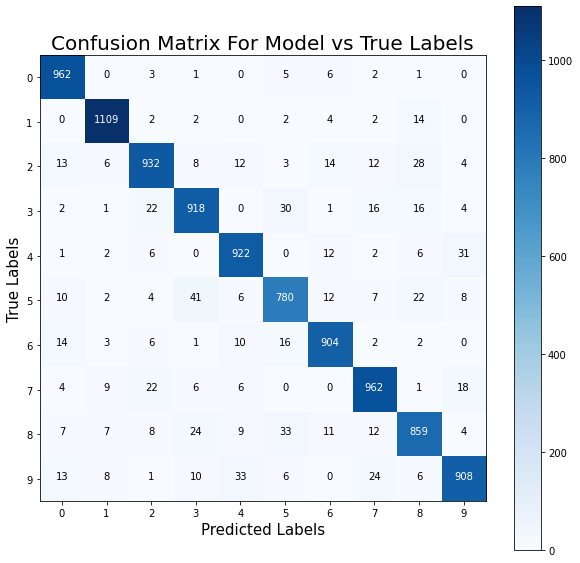

In [62]:
#Creating a plotting function for a confusion matrix
import itertools
cm = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis = -1))
plt.figure(figsize=(10, 10))
plt.imshow(cm, plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix For Model vs True Labels", size = 20)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
plt.xlabel("Predicted Labels", size = 15)
plt.xticks(np.arange(0, 10))
plt.ylabel("True Labels", size = 15)
plt.yticks(np.arange(0, 10))
plt.show()

In [63]:
score = model.evaluate(X_test, y_test)
print("loss:", score[0], "acc:", score[1])

313/313 [==============================] - 0s 879us/step - loss: 0.2563 - accuracy: 0.9256
loss: 0.25626498460769653 acc: 0.925599992275238


In [64]:
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

In [65]:
#TODO: Create model, compile, and train (and I highly recommend that you
#plot/make a confusion matrix, as it's super helpful in gaining context to 
#how your model is acting and where is error largest.)
###YOUR CODE BELOW###
your_model = ...

In [28]:
#Tester cell to see if your model is beating my results
#Run this for your credit
# your_score = your_model.evaluate(X_test, y_test)
# print("loss:", your_score[0], "acc:", your_score[1])
# assert your_score[1] > score[1]

In [29]:
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

In [30]:
#Load Data
#HINT: You can load Fashion MNIST from Keras the same way you do with MNIST.
#You may have to do some digging on the internet in order to do this.
#This exercise is to get you familiar with the Keras API


#Your labels in y are numbers from 0-9. Each of those numbers corresponds to 
#an index to a label in the labels variable. i.e. 8 = "Bag", 4 = "Coat", etc.
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
         "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [31]:
#Analyze Data (Optional, up to you on what to discover). Recommend you take 
#plotImage to see how the data has been pre-processed initially. (In general, 
#it's always a good idea to know how your data looks like.) You may have to 
#modify plotImage.

In [33]:
#Pre-Process Data 
#Hint: Very similar to MNIST

In [34]:
#Create model
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

In [35]:
#Plots (Optional)

In [36]:
#Tester cell to see if your model is beating my results
# score = model.evaluate(X_test, y_test)
# print("loss:", score[0], "acc:", score[1])
# assert 0.89 < score[1], "Accuracy not high enough"

In [37]:
#Confusion Matrix
# import itertools
# cm = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis = -1))
# plt.figure(figsize=(10, 10))
# plt.imshow(cm, plt.cm.Blues)
# plt.colorbar()
# plt.title("Confusion Matrix For Model vs True Labels", size = 20)
# fmt = 'd'
# thresh = cm.max() / 2.
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], fmt),
#               horizontalalignment="center",
#               color="white" if cm[i, j] > thresh else "black")
# plt.xlabel("Predicted Labels", size = 15)
# plt.xticks(np.arange(0, 10), labels=labels, rotation = 45)
# plt.ylabel("True Labels", size = 15)
# plt.yticks(np.arange(0, 10), labels=labels)
# plt.show()